# Caitlyn Clark's Perfromance in Womens College Basketball

### Presented by: Bladimir Nunez
### Updated: April 1, 2024


## Project Overview 
Many Consider Caitlyn Clark who is currently a guard for the Iowa Hawkeyes womens basketball team to be the greatest player ever in womens basketball thus far. But with every great thing theres always the bad. With her fans there are also critics who think because Caitlyn Clark currently leads D1 womens basketball in scoring that she is considered a "ball-hog" which indicates she never passes the ball to her teammates. This project will compare Caitlyn Clark and other women basketball players in division 1 in scoring and assists so far this year. As I compare the scoring to assists ratio I will want to prove that she is not a "ball-hog" and indeed passes the ball to her teammates and still is efficient herself with her scoring capabilities. 

1.) Prove that Caitlyn Clark is not indeed a "ball-hog" but an efficient scorer and passer

## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

## Gather Data Needed For Analysis

In [2]:
# gather data from NCAA website for top 10 scorers in points per game
points_per_game_url = 'https://www.ncaa.com/stats/basketball-women/d1'
points_per_game_req = requests.get(points_per_game_url)
soup = BeautifulSoup(points_per_game_req.text, 'html')




In [3]:
# Get points per game table
points_table = soup.find('table')

# Access the titles in points per game table
points_titles = points_table.find_all('th')
titles = [title.text.strip() for title in points_titles]


# get each row in table
points_column_data = points_table.find_all('tr')

# Create dataframe for points table
df = pd.DataFrame(columns = titles)


for row in points_column_data[1:]:
    row_data = row.find_all('td')
    rows = [data.text.strip() for data in row_data]
   
    
    
    length = len(df)
    df.loc[length] = rows

        


        
        

In [4]:
# Access all assists pages URLS
assists_per_game_url_one = 'https://www.ncaa.com/stats/basketball-women/d1/current/individual/106'
assists_per_game_url_two = 'https://www.ncaa.com/stats/basketball-women/d1/current/individual/106/p2'
assists_per_game_url_three = 'https://www.ncaa.com/stats/basketball-women/d1/current/individual/106/p3'
assists_per_game_url_four = 'https://www.ncaa.com/stats/basketball-women/d1/current/individual/106/p4'
assists_per_game_url_five = 'https://www.ncaa.com/stats/basketball-women/d1/current/individual/106/p5'

# create request to each URL and make Soup object
assists_req_one = requests.get(assists_per_game_url_one)
assists_req_two = requests.get(assists_per_game_url_two)
assists_req_three = requests.get(assists_per_game_url_three)
assists_req_four = requests.get(assists_per_game_url_four)
assists_req_five = requests.get(assists_per_game_url_five)

# soup objects for each page
soup_assists_one = BeautifulSoup(assists_req_one.text, 'html')
soup_assists_two = BeautifulSoup(assists_req_two.text, 'html')
soup_assists_three = BeautifulSoup(assists_req_three.text, 'html')
soup_assists_four = BeautifulSoup(assists_req_four.text, 'html')
soup_assists_five = BeautifulSoup(assists_req_five.text, 'html')


In [5]:
# find tables on each page
first_table = soup_assists_one.find('table')
second_table = soup_assists_two.find('table')
third_table = soup_assists_three.find('table')
fourth_table = soup_assists_four.find('table')
fifth_table = soup_assists_five.find('table')

# First table titles
first_titles = first_table.find_all('th')
first_title = [title.text.strip() for title in first_titles]

# get table rows from all pages
first_column_data = first_table.find_all('tr')
second_column_data = second_table.find_all('tr')
third_column_data = third_table.find_all('tr')
fourth_column_data = fourth_table.find_all('tr')
fifth_column_data = fifth_table.find_all('tr')

# Create dataframe for assists table
assists_df = pd.DataFrame(columns = first_title )

# add first page of assists to df
for row_assist in first_column_data[1:]:
    one = row_assist.find_all('td')
    one_rows = [row.text.strip() for row in one]
    
    length = len(assists_df)
    assists_df.loc[length] = one_rows

# add second page of assists to df
for row_assist in second_column_data[1:]:
    two = row_assist.find_all('td')
    two_rows = [row.text.strip() for row in two]
    
    length = len(assists_df)
    assists_df.loc[length] = two_rows

# add third page of assists to df
for row_assist in third_column_data[1:]:
    three = row_assist.find_all('td')
    three_rows = [row.text.strip() for row in three]
    
    length = len(assists_df)
    assists_df.loc[length] = three_rows


# add fourth page of assists to df
for row_assist in fourth_column_data[1:]:
    four = row_assist.find_all('td')
    four_rows = [row.text.strip() for row in four]
    
    length = len(assists_df)
    assists_df.loc[length] = four_rows
    
# add fifth page of assists to df
for row_assist in fifth_column_data[1:]:
    five = row_assist.find_all('td')
    five_rows = [row.text.strip() for row in five]
    
    length = len(assists_df)
    assists_df.loc[length] = five_rows



In [6]:
pd.set_option("display.max_rows", None)



## Combine Dataframes into One

In [51]:
merge_df = pd.merge(df,assists_df, on='Name', how='outer')
merge_df

,Rank_x,Name,Team_x,PPG,Rank_y,Team_y,Cl,Height,Position,G,AST,APG
0,1,Caitlin Clark,Iowa,32.0,1,Iowa,Sr.,6-0,G,37,334,9.0
1,2,JuJu Watkins,Southern California,27.1,-,Southern California,Fr.,6-2,G,34,112,3.3
2,3,Lucy Olsen,Villanova,23.3,134,Villanova,Jr.,5-9,G,34,129,3.8
3,4,Chellia Watson,Buffalo,23.0,-,Buffalo,Sr.,5-8,G,33,108,3.3
4,5,Elizabeth Kitley,Virginia Tech,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Hannah Hidalgo,Notre Dame,22.6,24,Notre Dame,Fr.,5-6,G,35,194,5.5
6,7,Rachael Rose,Wofford,22.3,28,Wofford,Jr.,5-7,G,30,163,5.4
7,8,Dyaisha Fair,Syracuse,22.2,173,Syracuse,Sr.,5-5,G,32,114,3.6
8,9,Izzy Higginbottom,Arkansas St.,22.2,155,Arkansas St.,Jr.,5-7,G,26,95,3.7
9,10,McKenna Hofschild,Colorado St.,22.1,2,Colorado St.,Sr.,5-2,G,31,227,7.3


## Data Analysis (Visualization)

In [60]:
# Show table sort by APG show Caitlyn Clark leads in APG
merge_df = merge_df[['Name','PPG','APG']].head(15)

# Add PPG for Katie Dinnebier, Georgia Amoore,Benthe Versteeg,Mama Dembele,Nika Muhl 
# ADD APG for Elizabeth Kitley cause she did not make the 250 list of players in assists

merge_df.at[10, 'PPG'] = '18.1'
merge_df.at[11, 'PPG'] = '18.8'
merge_df.at[12, 'PPG'] = '11.6'
merge_df.at[13, 'PPG'] = '10.2'
merge_df.at[14, 'PPG'] = '6.8'
merge_df.at[4, 'APG'] = '1.8'

top_stats = merge_df.sort_values(by=['APG'],ascending=False,ignore_index=True).head(15)
print(top_stats)



                 Name   PPG  APG
0       Caitlin Clark  32.0  9.0
1   McKenna Hofschild  22.1  7.3
2     Katie Dinnebier  18.1  6.9
3      Georgia Amoore  18.8  6.8
4     Benthe Versteeg  11.6  6.7
5        Mama Dembele  10.2  6.5
6           Nika Muhl   6.8  6.5
7      Hannah Hidalgo  22.6  5.5
8        Rachael Rose  22.3  5.4
9          Lucy Olsen  23.3  3.8
10  Izzy Higginbottom  22.2  3.7
11       Dyaisha Fair  22.2  3.6
12       JuJu Watkins  27.1  3.3
13     Chellia Watson  23.0  3.3
14   Elizabeth Kitley  22.8  1.8


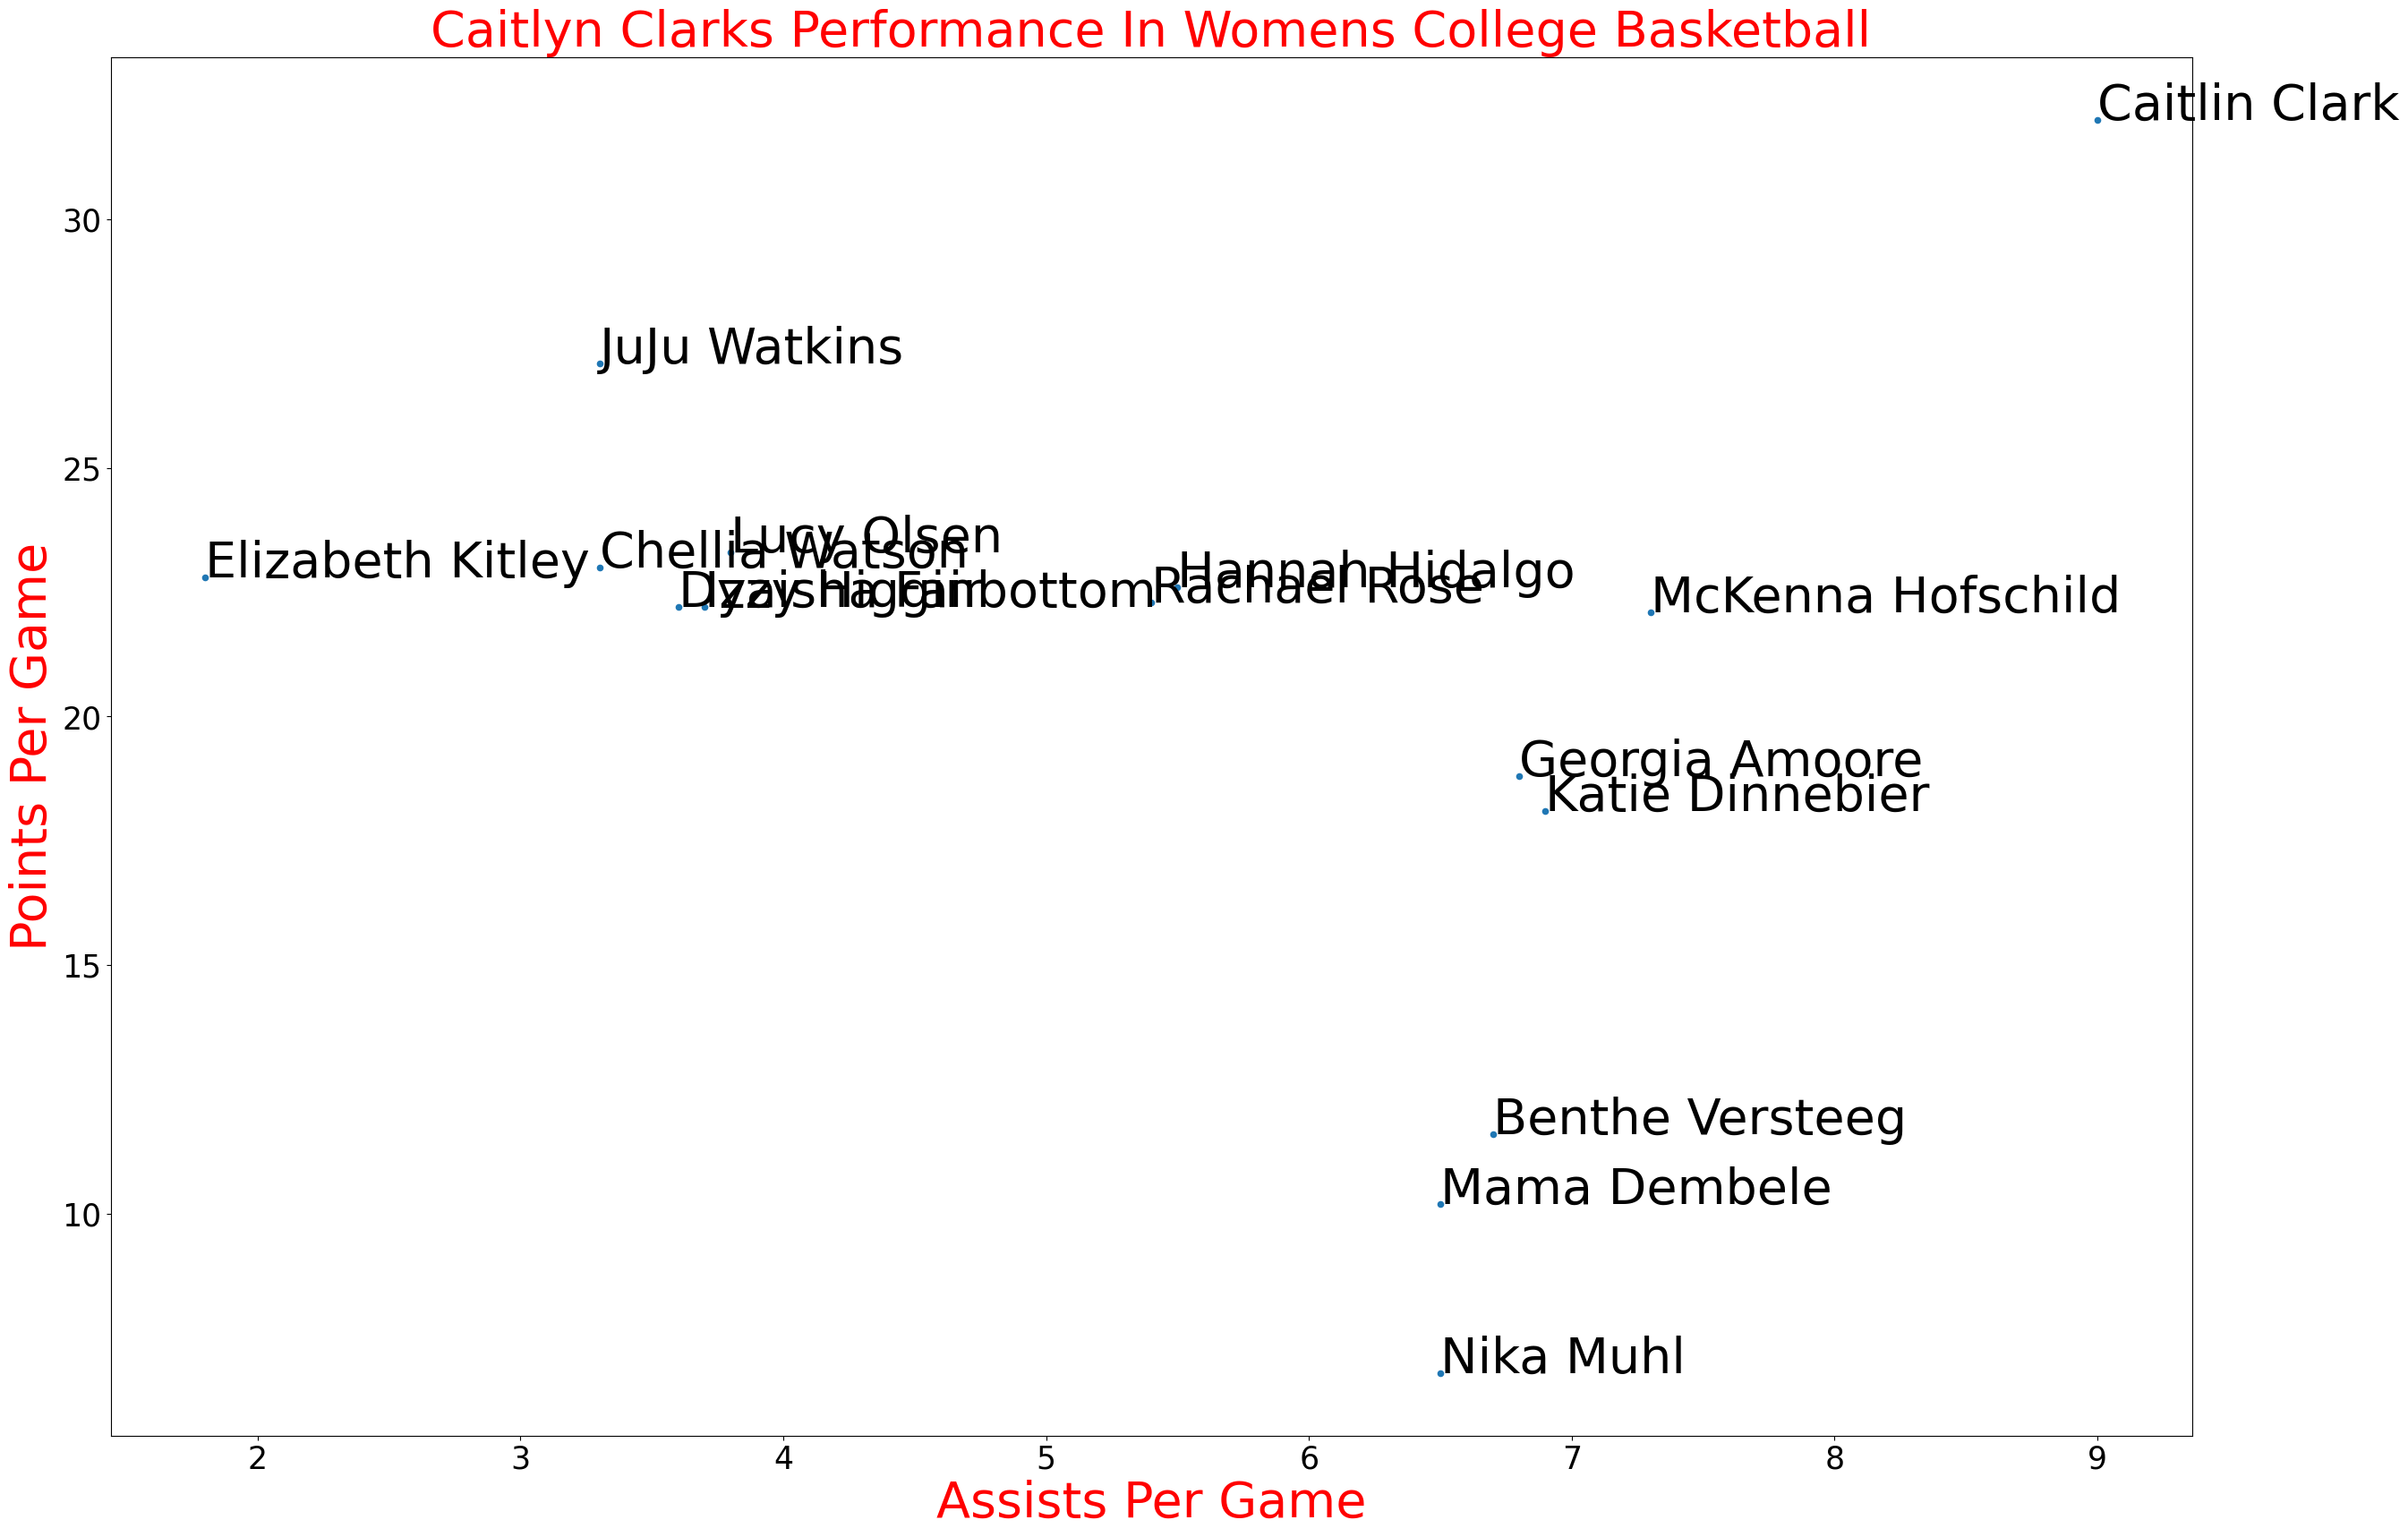

In [61]:
# Convert the columns to numeric types
top_stats['APG'] = pd.to_numeric(top_stats['APG'], errors='coerce')
top_stats['PPG'] = pd.to_numeric(top_stats['PPG'], errors='coerce')

# Create the scatter plot
ax = top_stats.plot(kind="scatter", x="APG", y="PPG", fontsize=25, figsize=(30,20))
ax.set_xlabel('Assists Per Game',fontsize = 40, color="red")
ax.set_ylabel("Points Per Game",fontsize = 40, color="red")
ax.set_title('Caitlyn Clarks Performance In Womens College Basketball',fontsize = 40, color="red")

# Annotate the points
for index, row in top_stats.iterrows():
    ax.annotate(row['Name'], (row['APG'], row['PPG']), fontsize=40)


